In [1]:
import os

import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle

In [2]:
FTRAIN = 'training.csv'
FTEST = 'test.csv'

In [3]:
def load(test=False, cols=None):
    
    fname = FTEST if test else FTRAIN
    df = read_csv(os.path.expanduser(fname)) 

    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    if cols: 
        df = df[list(cols) + ['Image']]

    print(df.count())  
    df = df.dropna()  

    X = np.vstack(df['Image'].values) / 255.  
    X = X.astype(np.float32)

    if not test: 
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  
        X, y = shuffle(X, y, random_state=42)  
        y = y.astype(np.float32)
    else:
        y = None

    return X, y

In [4]:
X, y = load()
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(
    X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(
    y.shape, y.min(), y.max()))

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [5]:
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet

C:\Users\ajays\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
net1 = NeuralNet(
    layers=[  
        ('input', layers.InputLayer),
        ('hidden', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    
    input_shape=(None, 9216),  
    hidden_num_units=100,  
    output_nonlinearity=None,  
    output_num_units=30,  

    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,  
    max_epochs=400,  
    verbose=1,
    )

In [7]:
X, y = load()
net1.fit(X, y)

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


# Neural Network with 924730 learnable parameters

## Layer information

  #  name      size
---  ------  ------
  0  input     9216
  1  hidden     100
  2  output      30

  epoch    trn loss    val loss    trn/val  dur
-------  ----------  ----------  ---------  -----
      1     0.12514     0.03964    3.15671  0.55s
      2     0.02108     0.01689    1.24814  0.62s
      3     0.01572     0.01469    1.06995  0.62s
      4     0.01402     0.01365    1.02783  0.57s
      5     0.01314     0.01299    1.01210  0.57s
      6     0.01251     0.01245    1.00518  0.52s
      7     0.01201     0.01200    1.00045  0.68s
      8     0.01159     0.01163    0.99649  0.53s
      9     0.01122     0.01130    0.99310  0.50s
     10     0.01090     0.01101    0.99007  0.49s
     11     0.01061     0.01075    0.98714  0.47s
     12     0.01035     0.01051    0.98486  0.48s
     13     0.01012     0.01030    0.98271  0.53s
     14     0.00990     0.01010    0.98064  0.57s
     15     0.00970     0.00

    118     0.00431     0.00506    0.85091  0.54s
    119     0.00429     0.00504    0.84989  0.54s
    120     0.00427     0.00503    0.84887  0.51s
    121     0.00425     0.00501    0.84782  0.50s
    122     0.00423     0.00499    0.84676  0.53s
    123     0.00421     0.00497    0.84567  0.53s
    124     0.00419     0.00496    0.84460  0.57s
    125     0.00417     0.00494    0.84349  0.55s
    126     0.00415     0.00492    0.84250  0.54s
    127     0.00413     0.00491    0.84133  0.51s
    128     0.00411     0.00489    0.84029  0.51s
    129     0.00409     0.00488    0.83934  0.53s
    130     0.00408     0.00486    0.83902  0.51s
    131     0.00406     0.00484    0.83793  0.50s
    132     0.00404     0.00483    0.83686  0.50s
    133     0.00402     0.00481    0.83580  0.51s
    134     0.00400     0.00480    0.83478  0.52s
    135     0.00399     0.00478    0.83369  0.52s
    136     0.00397     0.00477    0.83272  0.52s
    137     0.00395     0.00475    0.83168  0.53s


    239     0.00281     0.00378    0.74546  0.40s
    240     0.00281     0.00377    0.74497  0.41s
    241     0.00280     0.00376    0.74408  0.38s
    242     0.00279     0.00376    0.74365  0.39s
    243     0.00279     0.00375    0.74300  0.38s
    244     0.00278     0.00375    0.74205  0.37s
    245     0.00277     0.00374    0.74168  0.38s
    246     0.00277     0.00373    0.74078  0.43s
    247     0.00276     0.00373    0.74028  0.38s
    248     0.00275     0.00372    0.73946  0.38s
    249     0.00275     0.00371    0.73903  0.37s
    250     0.00274     0.00371    0.73806  0.36s
    251     0.00273     0.00370    0.73775  0.39s
    252     0.00273     0.00370    0.73684  0.37s
    253     0.00272     0.00369    0.73638  0.39s
    254     0.00271     0.00369    0.73566  0.39s
    255     0.00271     0.00368    0.73512  0.43s
    256     0.00270     0.00368    0.73445  0.36s
    257     0.00269     0.00367    0.73385  0.37s
    258     0.00269     0.00367    0.73307  0.37s


    360     0.00222     0.00328    0.67668  0.41s
    361     0.00222     0.00328    0.67610  0.64s
    362     0.00221     0.00328    0.67537  0.73s
    363     0.00221     0.00328    0.67501  0.54s
    364     0.00221     0.00327    0.67484  0.50s
    365     0.00220     0.00327    0.67379  0.50s
    366     0.00220     0.00327    0.67341  0.50s
    367     0.00220     0.00326    0.67342  0.49s
    368     0.00219     0.00326    0.67252  0.52s
    369     0.00219     0.00326    0.67186  0.51s
    370     0.00219     0.00326    0.67169  0.53s
    371     0.00218     0.00326    0.67097  0.52s
    372     0.00218     0.00325    0.67034  0.50s
    373     0.00218     0.00325    0.67004  0.53s
    374     0.00218     0.00325    0.66987  0.51s
    375     0.00217     0.00325    0.66909  0.51s
    376     0.00217     0.00324    0.66840  0.51s
    377     0.00217     0.00324    0.66844  0.50s
    378     0.00216     0.00324    0.66762  0.52s
    379     0.00216     0.00324    0.66705  0.52s


NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x000000001979F9E8>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x0000000016D75048>,
     check_input=True, custom_scores=None, hidden_num_units=100,
     input_shape=(None, 9216),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=400, more_params={},
     objective=<function objective at 0x00000000197A8668>,
     objective_loss_function=<function squared_error at 0x000000000B0E5588>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x00000000197ADF08>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x00000000197ADF48>],
     output_nonlinearity=None, output_num_units=30, regression=True,
     sc

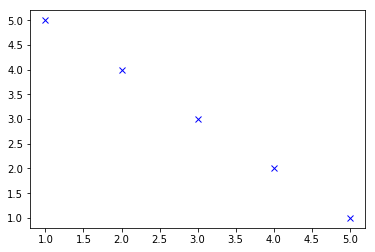

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],[5,4,3,2,1],"bx")
plt.show()

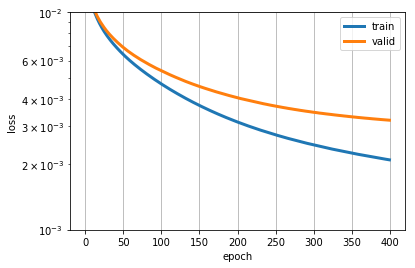

In [13]:
train_loss = np.array([i["train_loss"] for i in net1.train_history_])
valid_loss = np.array([i["valid_loss"] for i in net1.train_history_])
plt.plot(train_loss, linewidth=3, label="train")
plt.plot(valid_loss, linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.ylim(1e-3, 1e-2)
plt.yscale("log")
plt.show()

ImageId    1783
Image      1783
dtype: int64


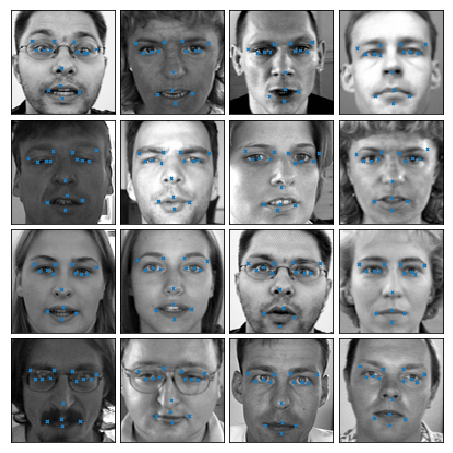

In [16]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

X, _ = load(test=True)
y_pred = net1.predict(X)

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred[i], ax)

plt.show()

In [17]:
def load2d(test=False, cols=None):
    X, y = load(test=test)
    X = X.reshape(-1, 1, 96, 96)
    return X, y

In [18]:
net2 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('conv3', layers.Conv2DLayer),
        ('pool3', layers.MaxPool2DLayer),
        ('hidden4', layers.DenseLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, 96, 96),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    hidden4_num_units=500, hidden5_num_units=500,
    output_num_units=30, output_nonlinearity=None,

    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,
    max_epochs=1000,
    verbose=1,
    )

X, y = load2d() 
net2.fit(X, y)

import cPickle as pickle
with open('net2.pickle', 'wb') as f:
    pickle.dump(net2, f, -1)

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b